In [6]:
import matplotlib.pyplot as plt 
import numpy as np

data = np.loadtxt('output.txt')

/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


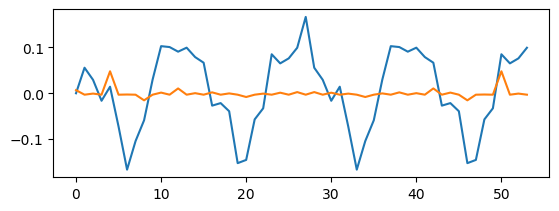

In [10]:
mod = data[4:]

tf = np.fft.fft(mod)/len(mod)

plt.subplot(2,1,1)
plt.plot(mod)
plt.plot(tf)

/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


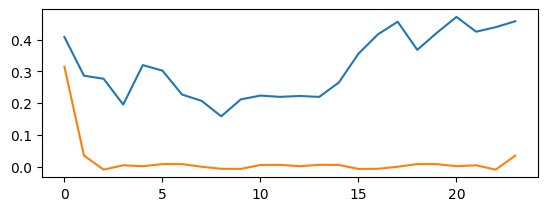

In [14]:
mod = data[4:]

tf = np.fft.fft(mod)/len(mod)

plt.subplot(2,1,1)
plt.plot(mod)
plt.plot(tf)

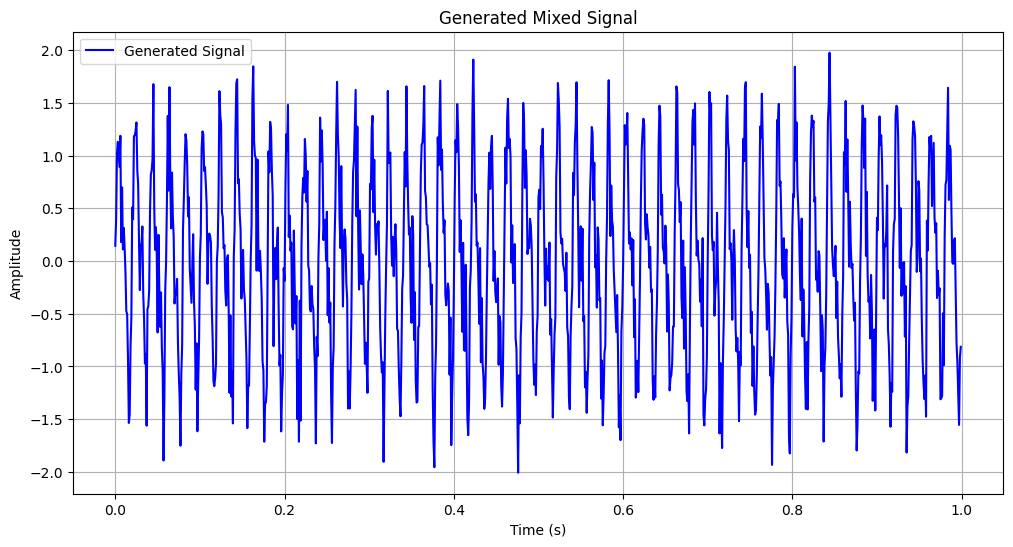

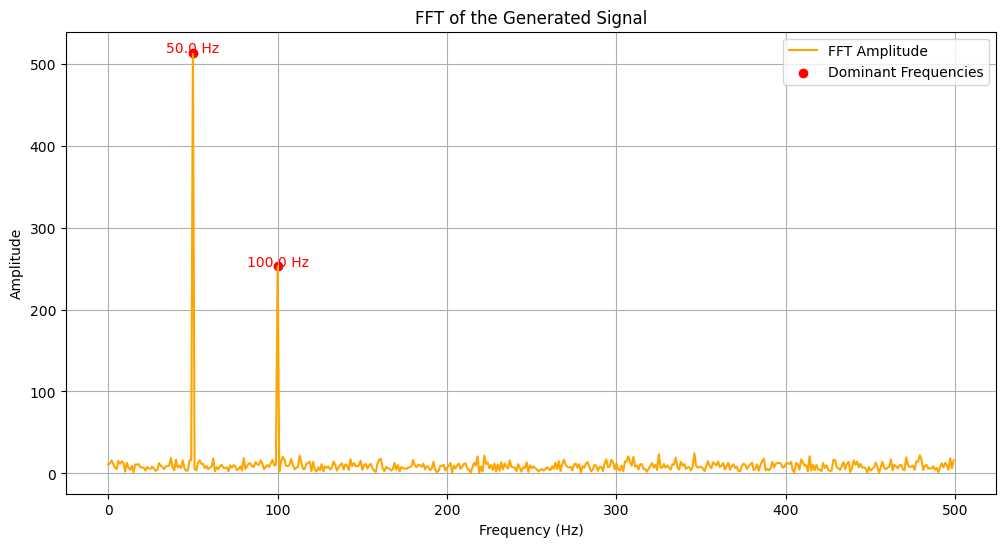

Dominant Frequencies and Amplitudes:
Frequency: 50.00 Hz, Amplitude: 513.49
Frequency: 100.00 Hz, Amplitude: 252.73

Inferred Function Components:
Component 1: 513.49 * sin(2 * pi * 50.00 * t)
Component 2: 252.73 * sin(2 * pi * 100.00 * t)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Step 1: Generate synthetic data
# Define time vector
sampling_rate = 1000  # samples per second
duration = 1  # seconds
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define a mixed signal: a combination of two sine waves and random noise
freq1 = 50  # Frequency of first sine wave (Hz)
freq2 = 100  # Frequency of second sine wave (Hz)
amplitude1 = 1.0  # Amplitude of first sine wave
amplitude2 = 0.5  # Amplitude of second sine wave

# Create the signal
signal = (amplitude1 * np.sin(2 * np.pi * freq1 * time) +
          amplitude2 * np.sin(2 * np.pi * freq2 * time) +
          0.3 * np.random.randn(len(time)))  # Add random noise

# Step 2: Plot the generated signal
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label="Generated Signal", color="blue")
plt.title("Generated Mixed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Perform FFT to find dominant frequencies
fft_result = fft(signal)
amplitudes = np.abs(fft_result)  # Magnitude of FFT
frequencies = fftfreq(len(time), 1 / sampling_rate)  # Frequency axis

# Only consider positive frequencies
positive_freqs = frequencies[:len(frequencies)//2]
positive_amplitudes = amplitudes[:len(frequencies)//2]

# Find the dominant frequencies
sorted_indices = np.argsort(positive_amplitudes)[::-1]  # Sort by amplitude, descending
dominant_frequencies = positive_freqs[sorted_indices[:2]]  # Take the top 2 frequencies

dominant_amplitudes = positive_amplitudes[sorted_indices[:2]]

# Step 4: Plot FFT results
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes, label="FFT Amplitude", color="orange")
plt.scatter(dominant_frequencies, dominant_amplitudes, color="red", label="Dominant Frequencies")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    plt.text(f, a, f"{f:.1f} Hz", fontsize=10, color="red", ha="center")
plt.title("FFT of the Generated Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Print dominant frequencies and their amplitudes
print("Dominant Frequencies and Amplitudes:")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")

# Step 6: Display the inferred initial function
print("\nInferred Function Components:")
for i, (f, a) in enumerate(zip(dominant_frequencies, dominant_amplitudes), start=1):
    print(f"Component {i}: {a:.2f} * sin(2 * pi * {f:.2f} * t)")

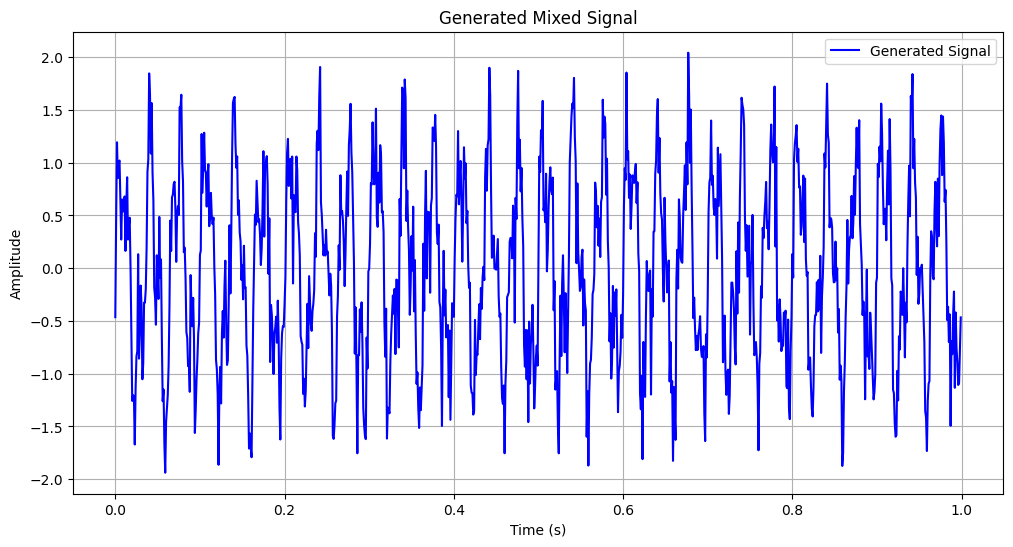

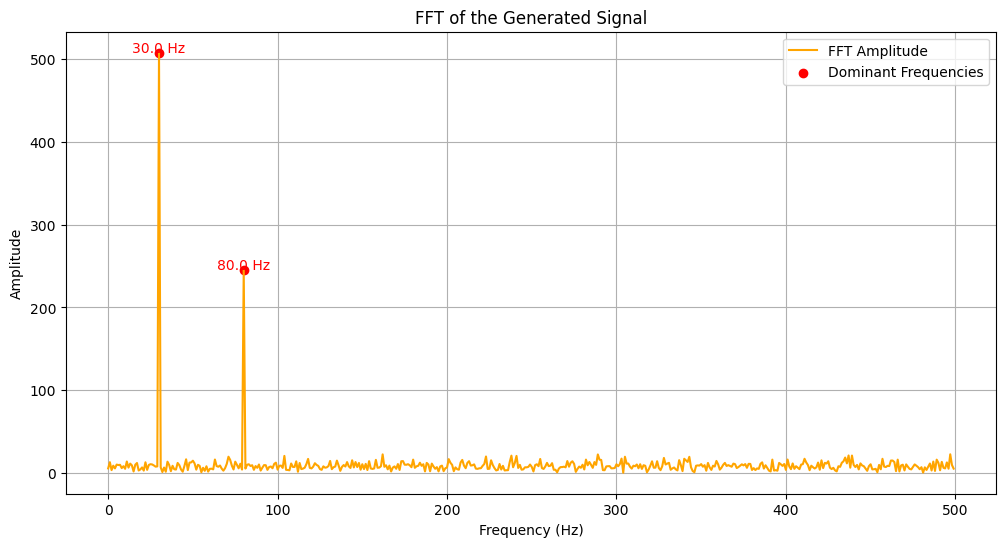

Dominant Frequencies and Amplitudes:
Frequency: 30.00 Hz, Amplitude: 507.95
Frequency: 80.00 Hz, Amplitude: 245.47


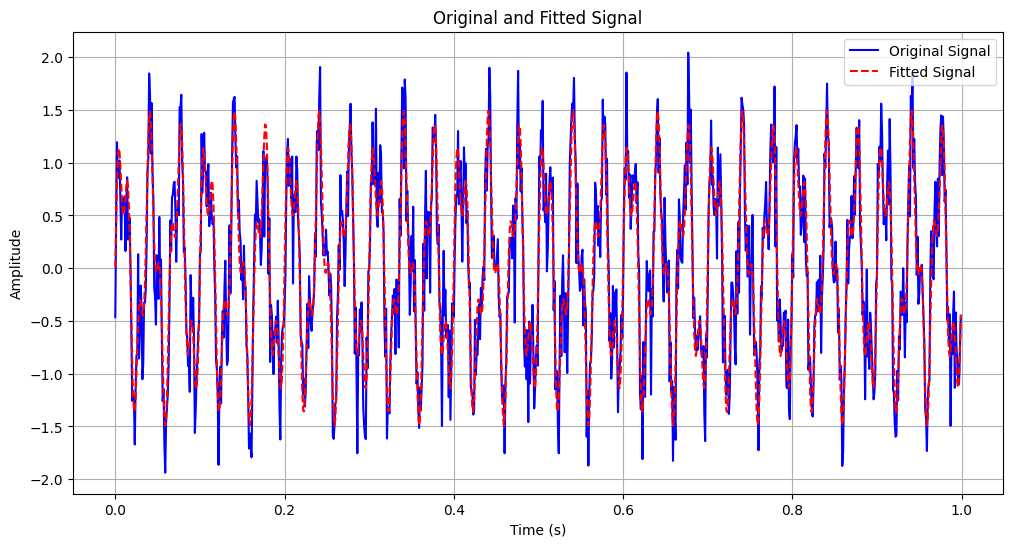

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

# Step 1: Generate synthetic data
# Define time vector
sampling_rate = 1000  # samples per second
duration = 1  # seconds
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define a mixed signal: a combination of two sine waves and random noise
freq1 = 30  # Frequency of first sine wave (Hz)
freq2 = 80  # Frequency of second sine wave (Hz)
amplitude1 = 1.0  # Amplitude of first sine wave
amplitude2 = 0.5  # Amplitude of second sine wave

# Create the signal
signal = (amplitude1 * np.sin(2 * np.pi * freq1 * time) +
          amplitude2 * np.sin(2 * np.pi * freq2 * time) +
          0.3 * np.random.randn(len(time)))  # Add random noise

# Step 2: Plot the generated signal
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label="Generated Signal", color="blue")
plt.title("Generated Mixed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Perform FFT to find dominant frequencies
fft_result = fft(signal)
amplitudes = np.abs(fft_result)  # Magnitude of FFT
frequencies = fftfreq(len(time), 1 / sampling_rate)  # Frequency axis

# Only consider positive frequencies
positive_freqs = frequencies[:len(frequencies)//2]
positive_amplitudes = amplitudes[:len(frequencies)//2]

# Find the dominant frequencies
sorted_indices = np.argsort(positive_amplitudes)[::-1]  # Sort by amplitude, descending
dominant_frequencies = positive_freqs[sorted_indices[:2]]  # Take the top 2 frequencies

dominant_amplitudes = positive_amplitudes[sorted_indices[:2]]

# Step 4: Plot FFT results
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes, label="FFT Amplitude", color="orange")
plt.scatter(dominant_frequencies, dominant_amplitudes, color="red", label="Dominant Frequencies")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    plt.text(f, a, f"{f:.1f} Hz", fontsize=10, color="red", ha="center")
plt.title("FFT of the Generated Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Print dominant frequencies and their amplitudes
print("Dominant Frequencies and Amplitudes:")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")

# Step 6: Fit the data with the inferred function
def mixed_sine_wave(t, A1, f1, phase1, A2, f2, phase2):
    return (A1 * np.sin(2 * np.pi * f1 * t + phase1) +
            A2 * np.sin(2 * np.pi * f2 * t + phase2))

# Initial guess for curve fitting
initial_guess = [dominant_amplitudes[0], dominant_frequencies[0], 0, 
                 dominant_amplitudes[1], dominant_frequencies[1], 0]

params, _ = curve_fit(mixed_sine_wave, time, signal, p0=initial_guess)

# Generate the fitted signal
fitted_signal = mixed_sine_wave(time, *params)

# Step 7: Plot the original and fitted signals
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label="Original Signal", color="blue")
plt.plot(time, fitted_signal, label="Fitted Signal", linestyle="--", color="red")
plt.title("Original and Fitted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

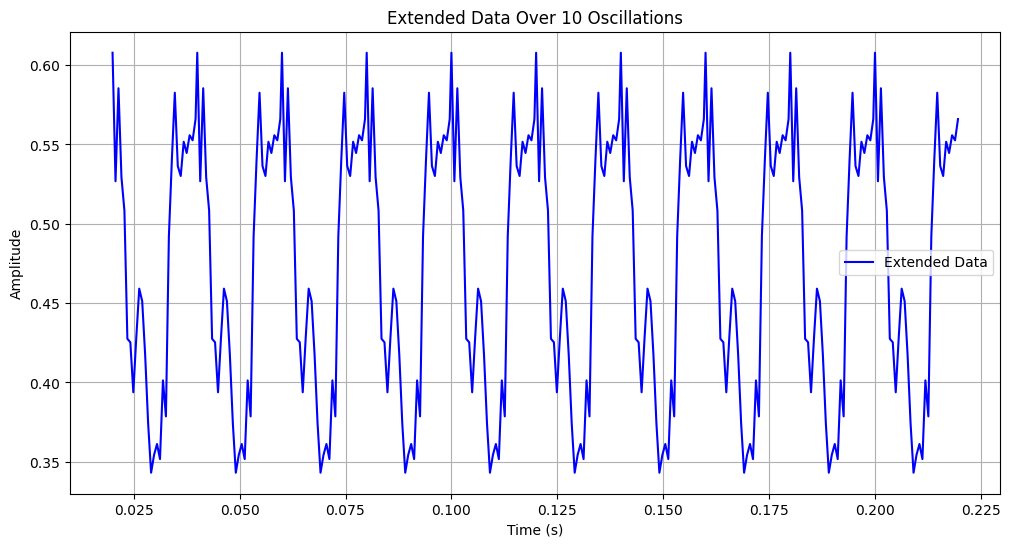

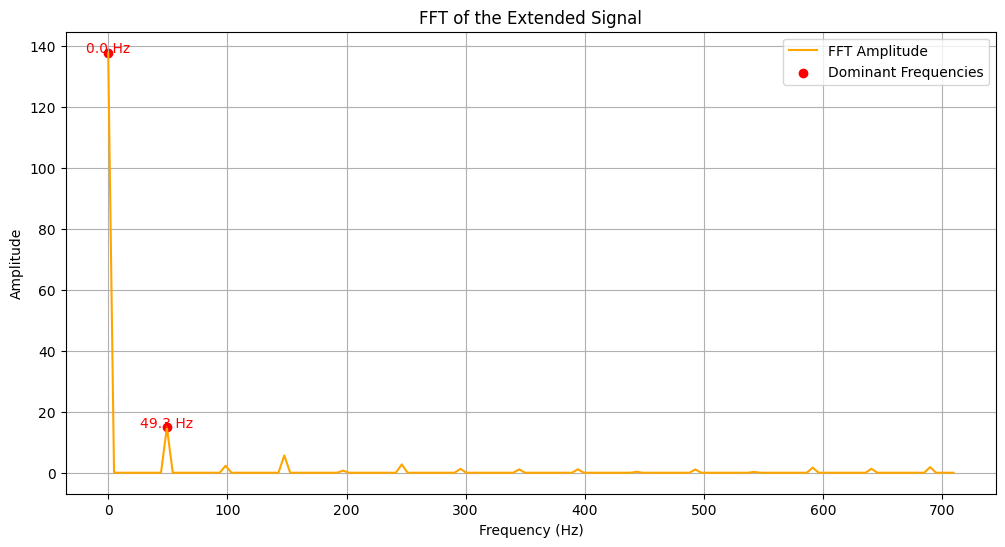

Dominant Frequencies and Amplitudes:
Frequency: 0.00 Hz, Amplitude: 137.76
Frequency: 49.26 Hz, Amplitude: 14.90


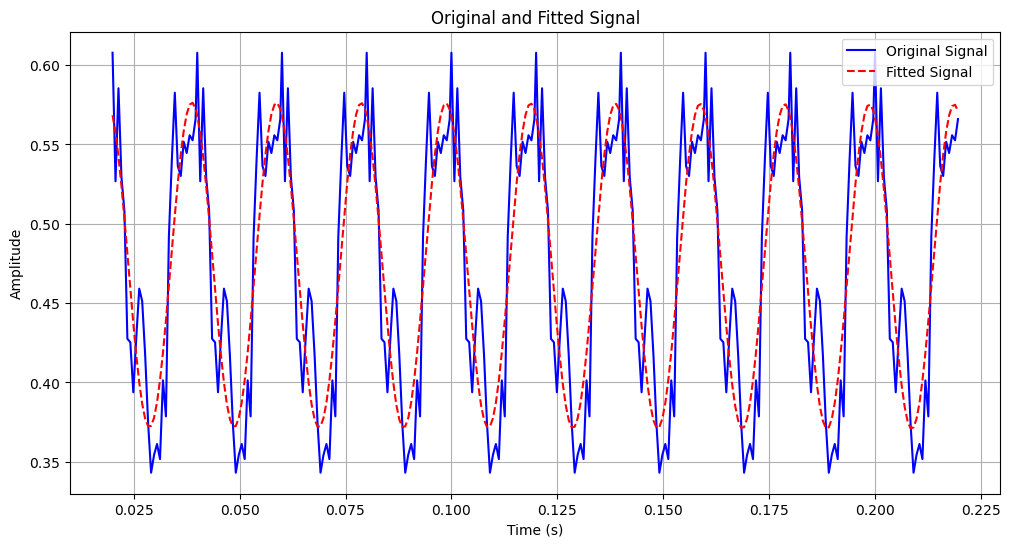


Fitted Parameters:
Amplitude 1: 137.40, Frequency 1: -0.00 Hz, Phase 1: 0.00
Amplitude 2: -0.10, Frequency 2: 50.01 Hz, Phase 2: -1.17


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

# Step 1: Use provided data and replicate for 10 oscillations
# Original data
original_data = np.array([
    0.6078, 0.5268, 0.5854, 0.5294, 0.5083, 0.4275, 0.4253, 0.3938, 0.4281, 
    0.4591, 0.4512, 0.4172, 0.3742, 0.3431, 0.3543, 0.3612, 0.3517, 0.4013, 
    0.3786, 0.4920, 0.5402, 0.5826, 0.5364, 0.5301, 0.5517, 0.5446, 0.5558, 
    0.5526, 0.5660
])
original_time = np.array([
    20.0000, 20.7000, 21.4000, 22.1000, 22.8000, 23.5000, 24.2000, 24.9000, 
    25.6000, 26.3000, 27.0000, 27.7000, 28.4000, 29.1000, 29.8000, 30.5000, 
    31.2000, 31.9000, 32.6000, 33.3000, 34.0000, 34.7000, 35.4000, 36.1000, 
    36.8000, 37.5000, 38.2000, 38.9000, 39.6000
])  # Time in ms

# Extend the data for 10 oscillations
num_repeats = 10
data = np.tile(original_data, num_repeats)
time = np.concatenate([original_time + 20 * i for i in range(num_repeats)])  # Add 20 ms for each repeat

# Convert time to seconds for processing
time = time / 1000  # Convert ms to seconds

# Step 2: Plot the extended data
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Extended Data", color="blue")
plt.title("Extended Data Over 10 Oscillations")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Perform FFT to find dominant frequencies
fft_result = fft(data)
amplitudes = np.abs(fft_result)  # Magnitude of FFT
frequencies = fftfreq(len(time), d=(time[1] - time[0]))  # Frequency axis

# Only consider positive frequencies
positive_freqs = frequencies[:len(frequencies)//2]
positive_amplitudes = amplitudes[:len(frequencies)//2]

# Find the dominant frequencies
sorted_indices = np.argsort(positive_amplitudes)[::-1]  # Sort by amplitude, descending
dominant_frequencies = positive_freqs[sorted_indices[:2]]  # Take the top 2 frequencies

dominant_amplitudes = positive_amplitudes[sorted_indices[:2]]

# Step 4: Plot FFT results
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes, label="FFT Amplitude", color="orange")
plt.scatter(dominant_frequencies, dominant_amplitudes, color="red", label="Dominant Frequencies")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    plt.text(f, a, f"{f:.1f} Hz", fontsize=10, color="red", ha="center")
plt.title("FFT of the Extended Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Print dominant frequencies and their amplitudes
print("Dominant Frequencies and Amplitudes:")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")

# Step 6: Fit the data with the inferred function
def mixed_sine_wave(t, A1, f1, phase1, A2, f2, phase2):
    return (A1 * np.sin(2 * np.pi * f1 * t + phase1) +
            A2 * np.sin(2 * np.pi * f2 * t + phase2))

# Initial guess for curve fitting
initial_guess = [dominant_amplitudes[0], dominant_frequencies[0], 0, 
                 dominant_amplitudes[1], dominant_frequencies[1], 0]

params, _ = curve_fit(mixed_sine_wave, time, data, p0=initial_guess)

# Generate the fitted signal
fitted_signal = mixed_sine_wave(time, *params)

# Step 7: Plot the original and fitted signals
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Original Signal", color="blue")
plt.plot(time, fitted_signal, label="Fitted Signal", linestyle="--", color="red")
plt.title("Original and Fitted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Print fitted parameters
print("\nFitted Parameters:")
print(f"Amplitude 1: {params[0]:.2f}, Frequency 1: {params[1]:.2f} Hz, Phase 1: {params[2]:.2f}")
print(f"Amplitude 2: {params[3]:.2f}, Frequency 2: {params[4]:.2f} Hz, Phase 2: {params[5]:.2f}")


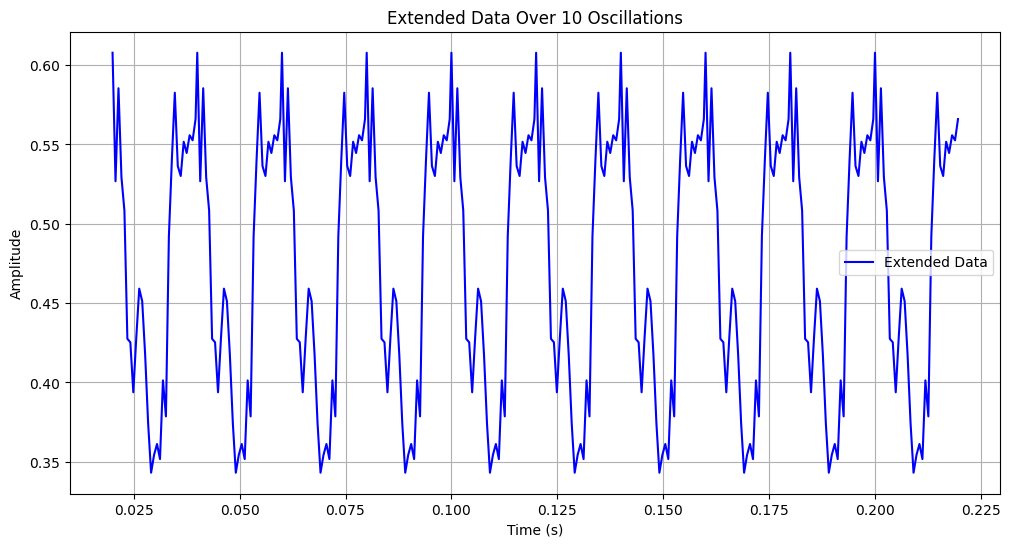

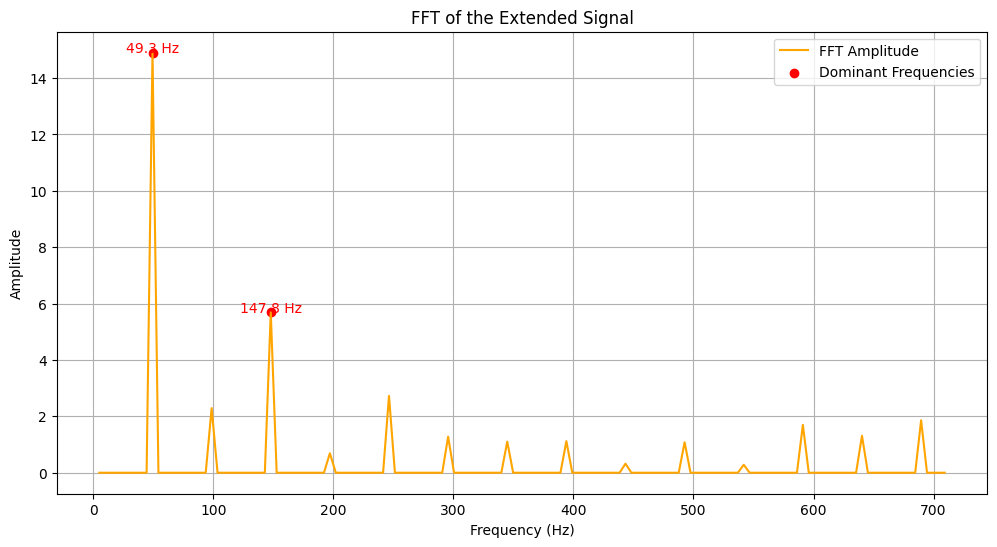

Dominant Frequencies and Amplitudes:
Frequency: 49.26 Hz, Amplitude: 14.90
Frequency: 147.78 Hz, Amplitude: 5.69


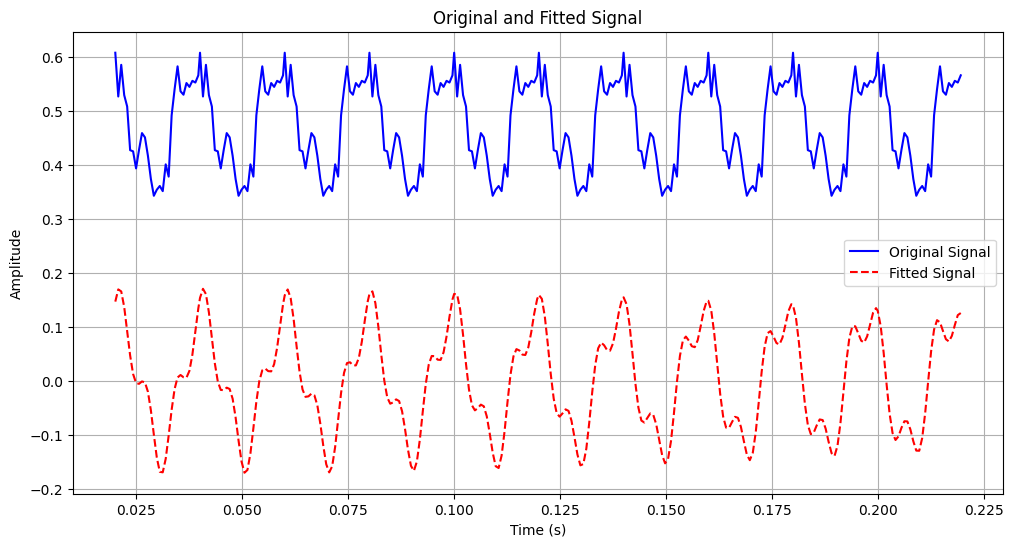


Fitted Parameters:
Amplitude 1: -0.12, Frequency 1: 51.02 Hz, Phase 1: -2.01
Amplitude 2: -0.05, Frequency 2: 150.67 Hz, Phase 2: -2.56


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

# Step 1: Use provided data and replicate for 10 oscillations
# Original data
original_data = np.array([
    0.6078, 0.5268, 0.5854, 0.5294, 0.5083, 0.4275, 0.4253, 0.3938, 0.4281, 
    0.4591, 0.4512, 0.4172, 0.3742, 0.3431, 0.3543, 0.3612, 0.3517, 0.4013, 
    0.3786, 0.4920, 0.5402, 0.5826, 0.5364, 0.5301, 0.5517, 0.5446, 0.5558, 
    0.5526, 0.5660
])
original_time = np.array([
    20.0000, 20.7000, 21.4000, 22.1000, 22.8000, 23.5000, 24.2000, 24.9000, 
    25.6000, 26.3000, 27.0000, 27.7000, 28.4000, 29.1000, 29.8000, 30.5000, 
    31.2000, 31.9000, 32.6000, 33.3000, 34.0000, 34.7000, 35.4000, 36.1000, 
    36.8000, 37.5000, 38.2000, 38.9000, 39.6000
])  # Time in ms

# Extend the data for 10 oscillations
num_repeats = 10
data = np.tile(original_data, num_repeats)
time = np.concatenate([original_time + 20 * i for i in range(num_repeats)])  # Add 20 ms for each repeat

# Convert time to seconds for processing
time = time / 1000  # Convert ms to seconds

# Step 2: Plot the extended data
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Extended Data", color="blue")
plt.title("Extended Data Over 10 Oscillations")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Perform FFT to find dominant frequencies
fft_result = fft(data)
amplitudes = np.abs(fft_result)  # Magnitude of FFT
frequencies = fftfreq(len(time), d=(time[1] - time[0]))  # Frequency axis

# Only consider positive frequencies, excluding 0 Hz
positive_freqs = frequencies[1:len(frequencies)//2]
positive_amplitudes = amplitudes[1:len(frequencies)//2]

# Find the dominant frequencies
sorted_indices = np.argsort(positive_amplitudes)[::-1]  # Sort by amplitude, descending
dominant_frequencies = positive_freqs[sorted_indices[:2]]  # Take the top 2 frequencies

dominant_amplitudes = positive_amplitudes[sorted_indices[:2]]

# Step 4: Plot FFT results
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes, label="FFT Amplitude", color="orange")
plt.scatter(dominant_frequencies, dominant_amplitudes, color="red", label="Dominant Frequencies")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    plt.text(f, a, f"{f:.1f} Hz", fontsize=10, color="red", ha="center")
plt.title("FFT of the Extended Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Print dominant frequencies and their amplitudes
print("Dominant Frequencies and Amplitudes:")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")

# Step 6: Fit the data with the inferred function
def mixed_sine_wave(t, A1, f1, phase1, A2, f2, phase2):
    return (A1 * np.sin(2 * np.pi * f1 * t + phase1) +
            A2 * np.sin(2 * np.pi * f2 * t + phase2))

# Initial guess for curve fitting
initial_guess = [dominant_amplitudes[0], dominant_frequencies[0], 0, 
                 dominant_amplitudes[1], dominant_frequencies[1], 0]

params, _ = curve_fit(mixed_sine_wave, time, data, p0=initial_guess)

# Generate the fitted signal
fitted_signal = mixed_sine_wave(time, *params)

# Step 7: Plot the original and fitted signals
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Original Signal", color="blue")
plt.plot(time, fitted_signal, label="Fitted Signal", linestyle="--", color="red")
plt.title("Original and Fitted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Print fitted parameters
print("\nFitted Parameters:")
print(f"Amplitude 1: {params[0]:.2f}, Frequency 1: {params[1]:.2f} Hz, Phase 1: {params[2]:.2f}")
print(f"Amplitude 2: {params[3]:.2f}, Frequency 2: {params[4]:.2f} Hz, Phase 2: {params[5]:.2f}")


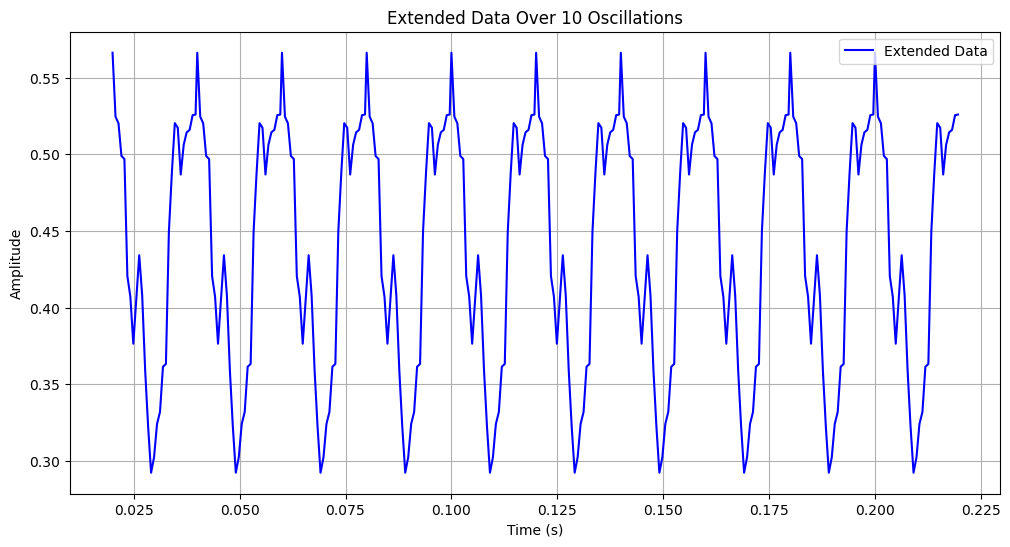

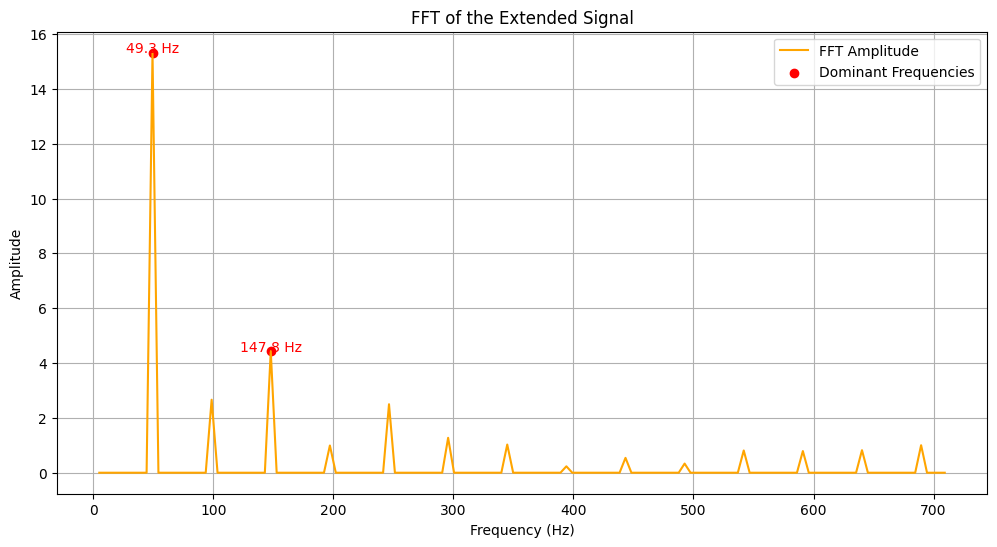

Dominant Frequencies and Amplitudes:
Frequency: 49.26 Hz, Amplitude: 15.32
Frequency: 147.78 Hz, Amplitude: 4.43


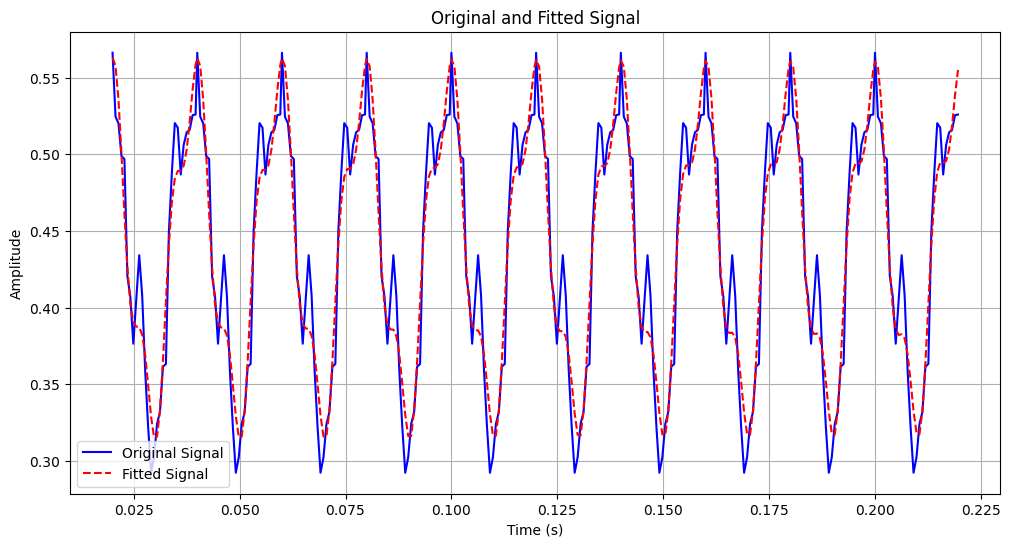


Fitted Parameters:
Amplitude 1: -0.10, Frequency 1: 50.02 Hz, Phase 1: -1.25
Amplitude 2: -0.03, Frequency 2: 149.89 Hz, Phase 2: -2.11
Offset: 0.44


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

# Step 1: Use new data
data = np.array([
    0.5662, 0.5245, 0.5202, 0.4989, 0.4969, 0.4206, 0.4072, 0.3765, 0.4057, 
    0.4342, 0.4078, 0.3591, 0.3224, 0.2924, 0.3025, 0.3242, 0.3320, 0.3615, 
    0.3633, 0.4495, 0.4877, 0.5203, 0.5173, 0.4868, 0.5062, 0.5143, 0.5159, 
    0.5255, 0.5259
])
original_time = np.array([
    20.0000, 20.7000, 21.4000, 22.1000, 22.8000, 23.5000, 24.2000, 24.9000, 
    25.6000, 26.3000, 27.0000, 27.7000, 28.4000, 29.1000, 29.8000, 30.5000, 
    31.2000, 31.9000, 32.6000, 33.3000, 34.0000, 34.7000, 35.4000, 36.1000, 
    36.8000, 37.5000, 38.2000, 38.9000, 39.6000
])  # Time in ms

# Extend the data for 10 oscillations
num_repeats = 10
data = np.tile(data, num_repeats)
time = np.concatenate([original_time + 20 * i for i in range(num_repeats)])  # Add 20 ms for each repeat

# Convert time to seconds for processing
time = time / 1000  # Convert ms to seconds

# Step 2: Plot the extended data
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Extended Data", color="blue")
plt.title("Extended Data Over 10 Oscillations")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Perform FFT to find dominant frequencies
fft_result = fft(data)
amplitudes = np.abs(fft_result)  # Magnitude of FFT
frequencies = fftfreq(len(time), d=(time[1] - time[0]))  # Frequency axis

# Only consider positive frequencies, excluding 0 Hz
positive_freqs = frequencies[1:len(frequencies)//2]
positive_amplitudes = amplitudes[1:len(frequencies)//2]

# Find the dominant frequencies
sorted_indices = np.argsort(positive_amplitudes)[::-1]  # Sort by amplitude, descending
dominant_frequencies = positive_freqs[sorted_indices[:2]]  # Take the top 2 frequencies

dominant_amplitudes = positive_amplitudes[sorted_indices[:2]]

# Step 4: Plot FFT results
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes, label="FFT Amplitude", color="orange")
plt.scatter(dominant_frequencies, dominant_amplitudes, color="red", label="Dominant Frequencies")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    plt.text(f, a, f"{f:.1f} Hz", fontsize=10, color="red", ha="center")
plt.title("FFT of the Extended Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Print dominant frequencies and their amplitudes
print("Dominant Frequencies and Amplitudes:")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")

# Step 6: Fit the data with the inferred function (including offset)
def mixed_sine_wave_with_offset(t, A1, f1, phase1, A2, f2, phase2, C):
    return (A1 * np.sin(2 * np.pi * f1 * t + phase1) +
            A2 * np.sin(2 * np.pi * f2 * t + phase2) + C)

# Initial guess for curve fitting (added an offset C)
initial_guess = [dominant_amplitudes[0], dominant_frequencies[0], 0, 
                 dominant_amplitudes[1], dominant_frequencies[1], 0, np.mean(data)]

params, _ = curve_fit(mixed_sine_wave_with_offset, time, data, p0=initial_guess)

# Generate the fitted signal
fitted_signal = mixed_sine_wave_with_offset(time, *params)

# Step 7: Plot the original and fitted signals
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Original Signal", color="blue")
plt.plot(time, fitted_signal, label="Fitted Signal", linestyle="--", color="red")
plt.title("Original and Fitted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Print fitted parameters
print("\nFitted Parameters:")
print(f"Amplitude 1: {params[0]:.2f}, Frequency 1: {params[1]:.2f} Hz, Phase 1: {params[2]:.2f}")
print(f"Amplitude 2: {params[3]:.2f}, Frequency 2: {params[4]:.2f} Hz, Phase 2: {params[5]:.2f}")
print(f"Offset: {params[6]:.2f}")


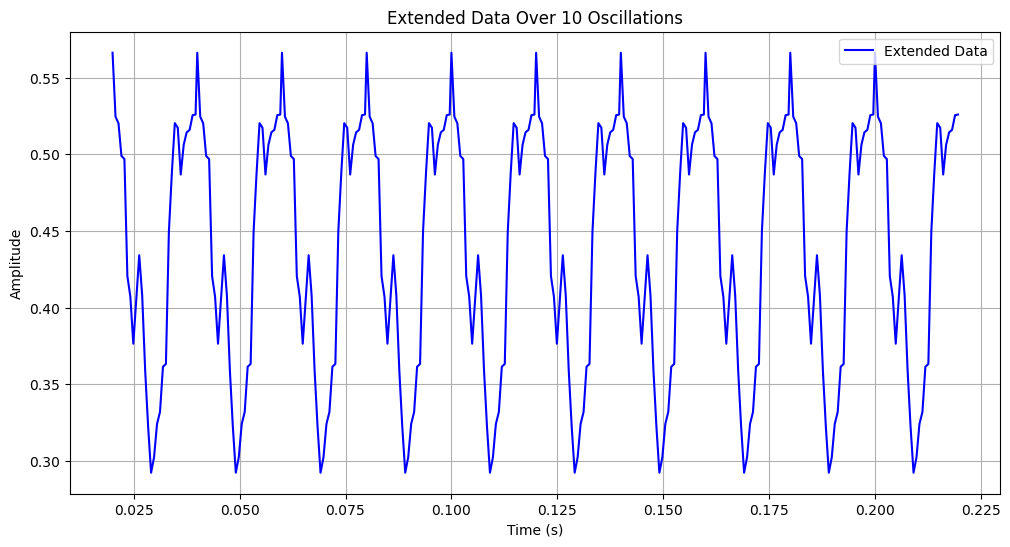

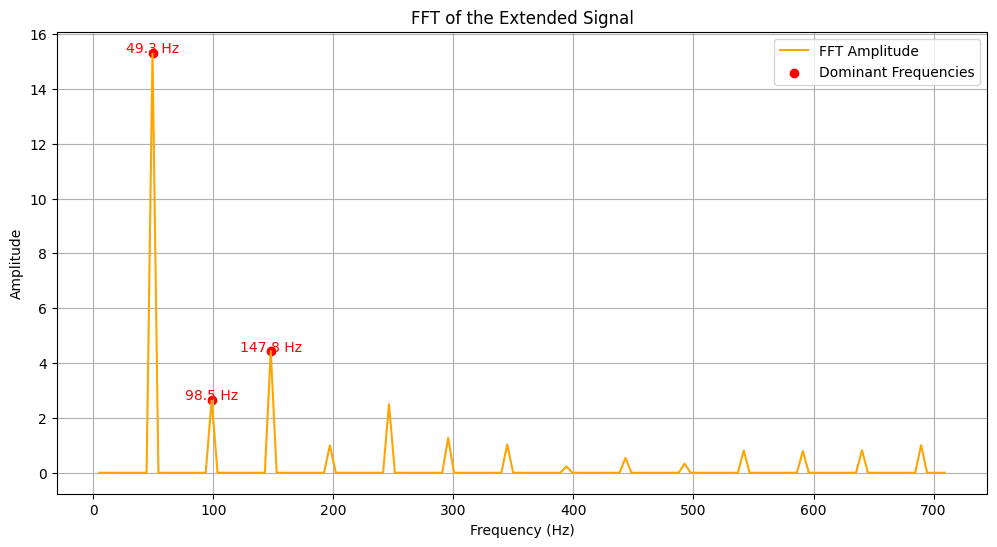

Dominant Frequencies and Amplitudes:
Frequency: 49.26 Hz, Amplitude: 15.32
Frequency: 147.78 Hz, Amplitude: 4.43
Frequency: 98.52 Hz, Amplitude: 2.66


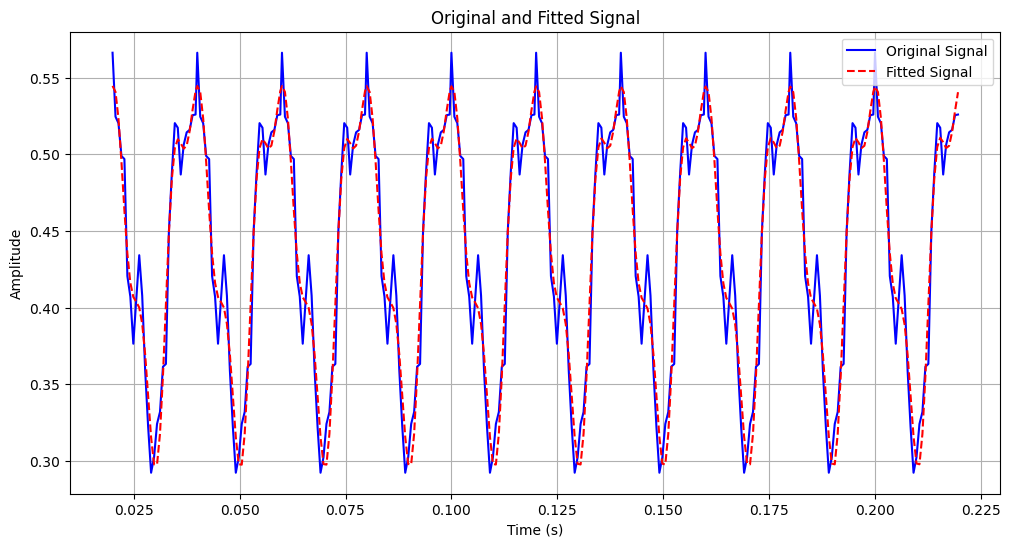


Fitted Parameters:
Amplitude 1: -0.11, Frequency 1: 50.00 Hz, Phase 1: -1.24
Amplitude 2: -0.03, Frequency 2: 149.98 Hz, Phase 2: -2.16
Amplitude 3: 0.02, Frequency 3: 100.01 Hz, Phase 3: -1.69
Offset: 0.44


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

# Step 1: Use new data
data = np.array([
    0.5662, 0.5245, 0.5202, 0.4989, 0.4969, 0.4206, 0.4072, 0.3765, 0.4057, 
    0.4342, 0.4078, 0.3591, 0.3224, 0.2924, 0.3025, 0.3242, 0.3320, 0.3615, 
    0.3633, 0.4495, 0.4877, 0.5203, 0.5173, 0.4868, 0.5062, 0.5143, 0.5159, 
    0.5255, 0.5259
])
original_time = np.array([
    20.0000, 20.7000, 21.4000, 22.1000, 22.8000, 23.5000, 24.2000, 24.9000, 
    25.6000, 26.3000, 27.0000, 27.7000, 28.4000, 29.1000, 29.8000, 30.5000, 
    31.2000, 31.9000, 32.6000, 33.3000, 34.0000, 34.7000, 35.4000, 36.1000, 
    36.8000, 37.5000, 38.2000, 38.9000, 39.6000
])  # Time in ms

# Extend the data for 10 oscillations
num_repeats = 10
data = np.tile(data, num_repeats)
time = np.concatenate([original_time + 20 * i for i in range(num_repeats)])  # Add 20 ms for each repeat

# Convert time to seconds for processing
time = time / 1000  # Convert ms to seconds

# Step 2: Plot the extended data
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Extended Data", color="blue")
plt.title("Extended Data Over 10 Oscillations")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Perform FFT to find dominant frequencies
fft_result = fft(data)
amplitudes = np.abs(fft_result)  # Magnitude of FFT
frequencies = fftfreq(len(time), d=(time[1] - time[0]))  # Frequency axis

# Only consider positive frequencies, excluding 0 Hz
positive_freqs = frequencies[1:len(frequencies)//2]
positive_amplitudes = amplitudes[1:len(frequencies)//2]

# Find the top 3 dominant frequencies
sorted_indices = np.argsort(positive_amplitudes)[::-1]  # Sort by amplitude, descending
dominant_frequencies = positive_freqs[sorted_indices[:3]]  # Take the top 3 frequencies
dominant_amplitudes = positive_amplitudes[sorted_indices[:3]]

# Step 4: Plot FFT results
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes, label="FFT Amplitude", color="orange")
plt.scatter(dominant_frequencies, dominant_amplitudes, color="red", label="Dominant Frequencies")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    plt.text(f, a, f"{f:.1f} Hz", fontsize=10, color="red", ha="center")
plt.title("FFT of the Extended Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Print dominant frequencies and their amplitudes
print("Dominant Frequencies and Amplitudes:")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")

# Step 6: Fit the data with the inferred function (including offset)
def mixed_sine_wave_with_offset(t, A1, f1, phase1, A2, f2, phase2, A3, f3, phase3, C):
    return (A1 * np.sin(2 * np.pi * f1 * t + phase1) +
            A2 * np.sin(2 * np.pi * f2 * t + phase2) +
            A3 * np.sin(2 * np.pi * f3 * t + phase3) + C)

# Initial guess for curve fitting (added an offset C)
initial_guess = [dominant_amplitudes[0], dominant_frequencies[0], 0, 
                 dominant_amplitudes[1], dominant_frequencies[1], 0,
                 dominant_amplitudes[2], dominant_frequencies[2], 0,
                 np.mean(data)]

params, _ = curve_fit(mixed_sine_wave_with_offset, time, data, p0=initial_guess)

# Generate the fitted signal
fitted_signal = mixed_sine_wave_with_offset(time, *params)

# Step 7: Plot the original and fitted signals
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Original Signal", color="blue")
plt.plot(time, fitted_signal, label="Fitted Signal", linestyle="--", color="red")
plt.title("Original and Fitted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Print fitted parameters
print("\nFitted Parameters:")
print(f"Amplitude 1: {params[0]:.2f}, Frequency 1: {params[1]:.2f} Hz, Phase 1: {params[2]:.2f}")
print(f"Amplitude 2: {params[3]:.2f}, Frequency 2: {params[4]:.2f} Hz, Phase 2: {params[5]:.2f}")
print(f"Amplitude 3: {params[6]:.2f}, Frequency 3: {params[7]:.2f} Hz, Phase 3: {params[8]:.2f}")
print(f"Offset: {params[9]:.2f}")



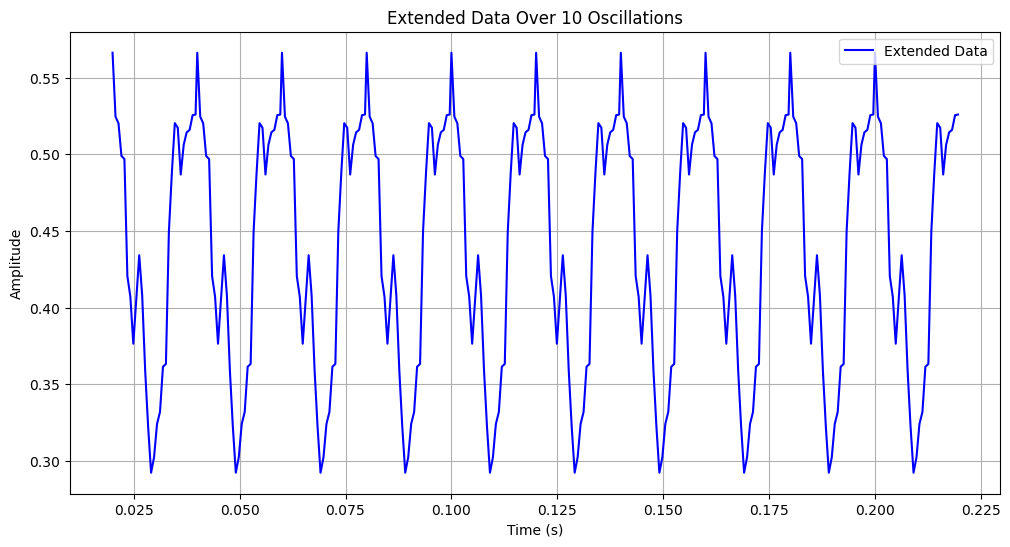

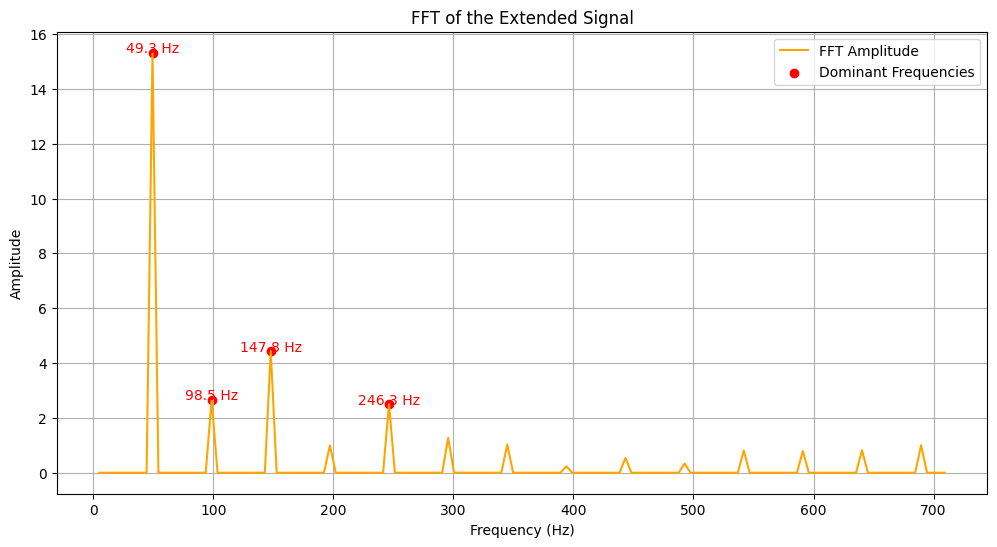

Dominant Frequencies and Amplitudes:
Frequency: 49.26 Hz, Amplitude: 15.32
Frequency: 147.78 Hz, Amplitude: 4.43
Frequency: 98.52 Hz, Amplitude: 2.66
Frequency: 246.31 Hz, Amplitude: 2.50


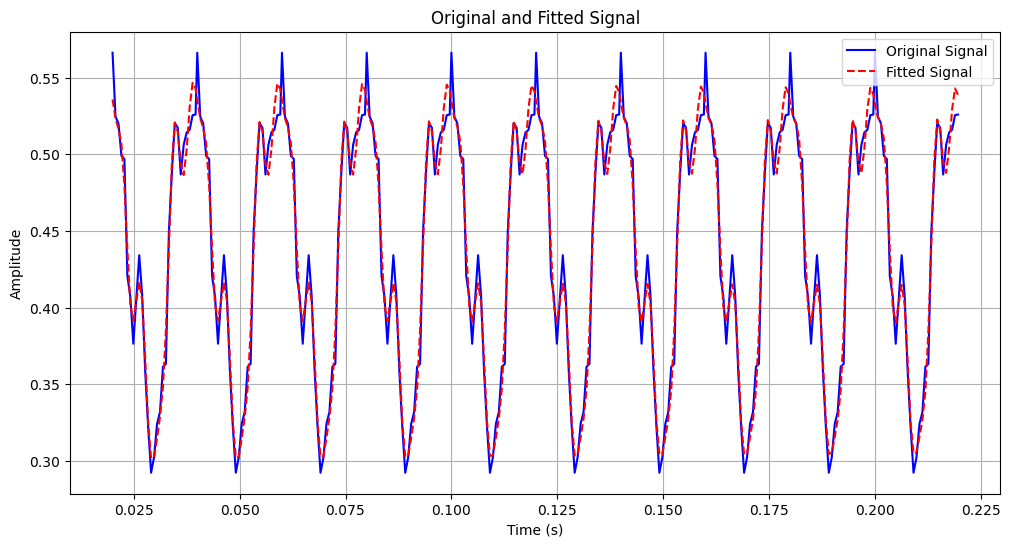


Fitted Parameters:
Amplitude 1: -0.11, Frequency 1: 50.00 Hz, Phase 1: -1.24
Amplitude 2: -0.03, Frequency 2: 149.93 Hz, Phase 2: -2.12
Amplitude 3: 0.02, Frequency 3: 100.03 Hz, Phase 3: -1.72
Amplitude 4: 0.02, Frequency 4: 250.09 Hz, Phase 4: -2.56
Offset: 0.44


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

# Step 1: Use new data
data = np.array([
    0.5662, 0.5245, 0.5202, 0.4989, 0.4969, 0.4206, 0.4072, 0.3765, 0.4057, 
    0.4342, 0.4078, 0.3591, 0.3224, 0.2924, 0.3025, 0.3242, 0.3320, 0.3615, 
    0.3633, 0.4495, 0.4877, 0.5203, 0.5173, 0.4868, 0.5062, 0.5143, 0.5159, 
    0.5255, 0.5259
])
original_time = np.array([
    20.0000, 20.7000, 21.4000, 22.1000, 22.8000, 23.5000, 24.2000, 24.9000, 
    25.6000, 26.3000, 27.0000, 27.7000, 28.4000, 29.1000, 29.8000, 30.5000, 
    31.2000, 31.9000, 32.6000, 33.3000, 34.0000, 34.7000, 35.4000, 36.1000, 
    36.8000, 37.5000, 38.2000, 38.9000, 39.6000
])  # Time in ms

# Extend the data for 10 oscillations
num_repeats = 10
data = np.tile(data, num_repeats)
time = np.concatenate([original_time + 20 * i for i in range(num_repeats)])  # Add 20 ms for each repeat

# Convert time to seconds for processing
time = time / 1000  # Convert ms to seconds

# Step 2: Plot the extended data
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Extended Data", color="blue")
plt.title("Extended Data Over 10 Oscillations")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Perform FFT to find dominant frequencies
fft_result = fft(data)
amplitudes = np.abs(fft_result)  # Magnitude of FFT
frequencies = fftfreq(len(time), d=(time[1] - time[0]))  # Frequency axis

# Only consider positive frequencies, excluding 0 Hz
positive_freqs = frequencies[1:len(frequencies)//2]
positive_amplitudes = amplitudes[1:len(frequencies)//2]

# Find the top 4 dominant frequencies
sorted_indices = np.argsort(positive_amplitudes)[::-1]  # Sort by amplitude, descending
dominant_frequencies = positive_freqs[sorted_indices[:4]]  # Take the top 4 frequencies
dominant_amplitudes = positive_amplitudes[sorted_indices[:4]]

# Step 4: Plot FFT results
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes, label="FFT Amplitude", color="orange")
plt.scatter(dominant_frequencies, dominant_amplitudes, color="red", label="Dominant Frequencies")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    plt.text(f, a, f"{f:.1f} Hz", fontsize=10, color="red", ha="center")
plt.title("FFT of the Extended Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Print dominant frequencies and their amplitudes
print("Dominant Frequencies and Amplitudes:")
for f, a in zip(dominant_frequencies, dominant_amplitudes):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")

# Step 6: Fit the data with the inferred function (including offset)
def mixed_sine_wave_with_offset(t, A1, f1, phase1, A2, f2, phase2, A3, f3, phase3, A4, f4, phase4, C):
    return (A1 * np.sin(2 * np.pi * f1 * t + phase1) +
            A2 * np.sin(2 * np.pi * f2 * t + phase2) +
            A3 * np.sin(2 * np.pi * f3 * t + phase3) +
            A4 * np.sin(2 * np.pi * f4 * t + phase4) + C)

# Initial guess for curve fitting (added an offset C)
initial_guess = [dominant_amplitudes[0], dominant_frequencies[0], 0, 
                 dominant_amplitudes[1], dominant_frequencies[1], 0,
                 dominant_amplitudes[2], dominant_frequencies[2], 0,
                 dominant_amplitudes[3], dominant_frequencies[3], 0,
                 np.mean(data)]

params, _ = curve_fit(mixed_sine_wave_with_offset, time, data, p0=initial_guess)

# Generate the fitted signal
fitted_signal = mixed_sine_wave_with_offset(time, *params)

# Step 7: Plot the original and fitted signals
plt.figure(figsize=(12, 6))
plt.plot(time, data, label="Original Signal", color="blue")
plt.plot(time, fitted_signal, label="Fitted Signal", linestyle="--", color="red")
plt.title("Original and Fitted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Print fitted parameters
print("\nFitted Parameters:")
print(f"Amplitude 1: {params[0]:.2f}, Frequency 1: {params[1]:.2f} Hz, Phase 1: {params[2]:.2f}")
print(f"Amplitude 2: {params[3]:.2f}, Frequency 2: {params[4]:.2f} Hz, Phase 2: {params[5]:.2f}")
print(f"Amplitude 3: {params[6]:.2f}, Frequency 3: {params[7]:.2f} Hz, Phase 3: {params[8]:.2f}")
print(f"Amplitude 4: {params[9]:.2f}, Frequency 4: {params[10]:.2f} Hz, Phase 4: {params[11]:.2f}")
print(f"Offset: {params[12]:.2f}")


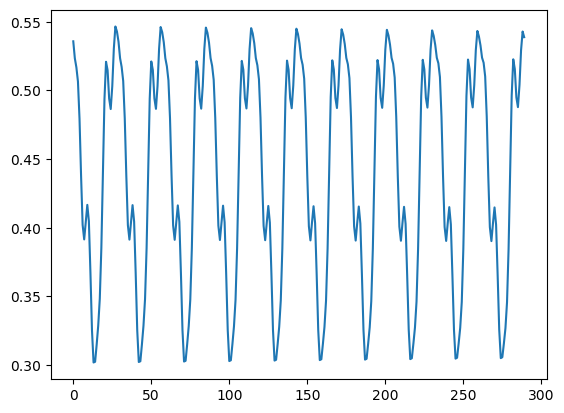

In [23]:
plt.plot(fitted_signal)

In [49]:
n_periods = 10 
n_points = len(fitted_signal)
sample_freq = 1/(0.020/(n_points/n_periods))
trig_type = 3
trig_internal = 1

# rescaling amplitude in volt
fitted_signal = (fitted_signal-0.44)/(np.pi*113e-6); #Hz
fitted_signal = fitted_signal/700000;         #G
#calibration = 0.131 G/A
#to correct 1kHz I need to sent 10 mA in the compensation coil 
fitted_signal = fitted_signal/0.131;         #A
fitted_signal = fitted_signal * 36;          #V  


out = np.append([n_points,sample_freq ,trig_type,trig_internal],fitted_signal,axis=0)

# Open a text file in write mode
with open("output.txt", "w") as file:
    # Write each value in the array to a new line
    for value in out:
        file.write(str(value) + '\n')

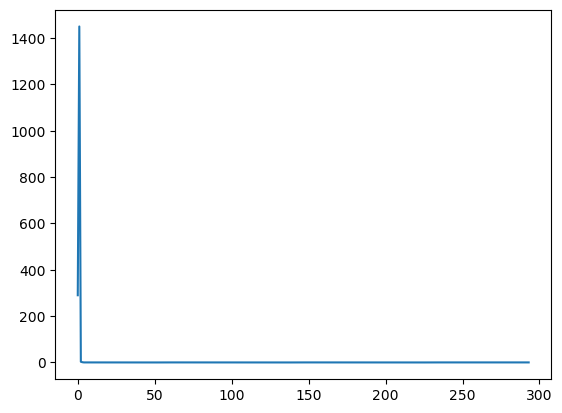

In [51]:
plt.plot(out)